# Homework Lecture 5

Use Newton-Raphson method to solve the following equation arrays:

Find the solution for  
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}

In [1]:
# Homework: using Newton-Raphson method to solve above equation arrays
# Hint: first you need to derive the partical derivative of the equation arrays. You can do it either 
# analytically by hand or numerically using method we learned in the last lecture.

## From Lecture notes

### Numerical Solutions
\begin{equation}
f_{i}(x_{1},x_{2},...,x_{N})=0, \qquad i=1,2,....,N
\end{equation}

\begin{equation}
{\bf f(y)}=\left[ \begin{array}{c} f_{1}(\bf{y}) \\ f_{2}(\bf{y})  \end{array}\right] = \left[ \begin{array}{c} x_{1}^2+x_{1}x_{2}-10 \\ x_{2}+3x_{1}x_{2}^2-57 \end{array}\right] =0 
\end{equation}

Make a guess ($x_{1},x_{2}$), and then correct it ($\Delta x_{1},\Delta x_{2}$), we have
\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})=0 \qquad, i=1,2
\end{equation}
We can expand it using Taylor series
\begin{equation}
f_{i}(x_{1}+\Delta x_{1}, x_{2}+\Delta x_{2})\simeq f_{i}(x_{1},x_{2})+\frac{\partial f_{i}}{\partial x_{1}}\Delta x_{1}+\frac{\partial f_{i}}{\partial x_{2}}\Delta x_{2}=0 \qquad i=1,2
\end{equation}

\begin{equation}
\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] + \begin{bmatrix} \partial f_{1}/\partial x_{1} & \partial f_{1}/\partial x_{2}  \\ \partial f_{2}/\partial x_{1} & \partial f_{2}/\partial x_{2} \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =0 
\end{equation}

So we want to solve the matrix equation
\begin{equation}
F'\Delta {\bf{x}}=-\bf{f}
\end{equation}
Here we use bold font for a vector, the captal letter to represent a matrix

For 2x2 array,
\begin{equation}
 \begin{bmatrix} a & b \\c & d \end{bmatrix}\left[ \begin{array}{c} \Delta x_{1} \\ \Delta x_{2}  \end{array}\right] =-\left[ \begin{array}{c} f_{1}\\ f_{2} \end{array}\right] 
\end{equation}
The solution is
\begin{eqnarray}
\Delta x_1=\frac{bf_2-df_1}{ad-bc}\\
\Delta x_2=\frac{cf_1-af_2}{ad-bc}
\end{eqnarray}

### Analytically take partial derivatives
Equations:
\begin{eqnarray}
f_1 = x^2_1 + x_1x_2 - 10\\
f_2 = x_2 + 3 x_1 x^2_2 - 57
\end{eqnarray}
The partial derivatives are:
\begin{eqnarray}
\frac{\partial f_1}{\partial x_1} &=& 2x_1 + x_2 = a\\
\frac{\partial f_1}{\partial x_2} &=& x_1 = b\\
\frac{\partial f_2}{\partial x_1} &=& 3 x^2_2 = c\\
\frac{\partial f_2}{\partial x_2} &=& 1 + 6x_1 x_2 = d
\end{eqnarray}

### First make a plot

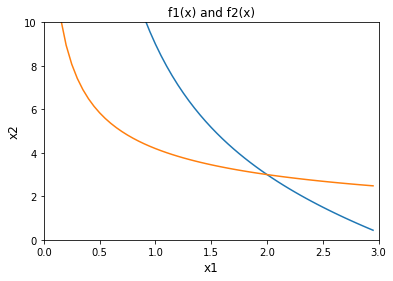

We can see that x1 should be 2 and x2 should be 3


In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    return (10.-x*x)/x

def f2(x):
    return (-1+np.sqrt(1.+4.*3.*x*57))/6./x

x1=np.arange(0.00001,3.0,0.05)
x2=np.arange(0.00001,3.0,0.05)

s1=f1(x1)
s2=f2(x2)

plt.plot(x1, s1)
plt.plot(x2,s2)
plt.xlim(0.0,3.0)
plt.ylim(0.0,10.0)
plt.title('f1(x) and f2(x)', fontsize=12)
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2',fontsize=12)

plt.show()
print('We can see that x1 should be 2 and x2 should be 3')

In [2]:
def fun(x):
    '''
    this is f1-f2 that I will use the calcualte the intersection points
    '''
    return ((10.-x*x)/x)-((-1+np.sqrt(1.+4.*3.*x*57))/6./x)

def Newton_Raphson(x0,dx,Nmax, eps,f):
    '''
    function to calcualte the roots or intersection of functions 
    using the Newton-Raphson backtracking method
    '''
    for i in range(0,Nmax):        
        df = (f(x0+dx/2)-f(x0-dx/2))/dx #derivative of function using central difference
        dxt = -f(x0)/df 
        while (abs(f(x0+dxt))>abs(f(x0))):
              dxt=dxt/2.
        x0 = x0+dxt  #new guess
        if(abs(f(x0))<eps):
              print("Root is at",x0," after ",i," iterations, with a precision of ",abs(f(x0)))
              break
    return print('This means that x2=f(x1)=',f1(x0))

dx=1.e-6
nmax=100
eps=1.e-8

guess_x1=1.7
print(Newton_Raphson(guess_x1,dx,nmax,eps,fun))

Root is at 1.9999999999999984  after  3  iterations, with a precision of  4.440892098500626e-15
This means that x2=f(x1)= 3.0000000000000053
None


In [54]:
def F(x,f):
    f[0]=x[0]*x[0]+x[0]*x[1]-10.
    f[1]=x[1]+3.*x[0]*x[1]*x[1]-57.

x=[1.7,2.7]  #inital guesses for x1 and x2
f=[0.,0.]

dx=1.e-6
nmax=100
eps=1.e-8

def Newton_Raphson_4(x,dx,Nmax, eps,f):
    for i in range(0,Nmax):  
        #partial derivatives
        a=2.*x[0]+x[1]
        b=x[0]
        c=3.*x[1]**2
        d=1.+6.*x[0]*x[1]
        F(x,f)                             #need to call function
        dx1=(b*f[1] - d*f[0])/(a*d - b*c)  #delta x1
        dx2=(c*f[0] - a*f[1])/(a*d - b*c)  #delta x2
        x=x+np.array([dx1,dx2])            #new guess
        print('x',x)
        if(max(abs(dx1),abs(dx2))<eps):
            print("Root is at",x," after ",i," iterations, with a precision of ",max(abs(dx1),abs(dx2)))
            break
    return x

print(Newton_Raphson_4(x,dx,nmax,eps,f))

x [2.012713   3.06026513]
x [1.99982599 3.00107354]
x [1.99999994 3.00000014]
x [2. 3.]
x [2. 3.]
Root is at [2. 3.]  after  4  iterations, with a precision of  1.2304520546089547e-15
[2. 3.]
